# Step 0: Testing the R-Environment and a hello world

Das wird eine kleine Anleitung wie R funktioniert. 

## elementare Funktionen

In [1]:
print("hello world") # This should display "[1] hello world in the next line"

[1] "hello world"


In [2]:
y = 1+1 ### Das Ergebnis einfacher Mathe als "y" speichern
y       ### Man fragt das System an, was jetzt y ist?
exp = 3 ### Ein Objekt "exp" ist eine Zahl und gleicht 3
exp     ### Man fragt das System an, was jetzt exp ist?
exp*y   ### Mathematische Operation


[1] 2

[1] 3

[1] 6

## Step 1: Install/Loading required packages for data analyses and visualization
[r- How to install multiple packages?](https://stackoverflow.com/questions/29041423/how-to-install-multiple-packages)

In [3]:
" Liste der Pakete, die man installieren möchte. Das installieren kann sehr lange dauern. 
Daher sollte man in der binder Umgebung dafür sorgen, dass die Pakete schon da sind. 
In R Studio funktioniert das genauso,
"


package.name <- c('plyr','lattice','psych','latticeExtra','ggplot2','RColorBrewer')
## install if they are not there
install.lib<-package.name[!package.name %in% installed.packages()]
## for loop
for(lib in install.lib) install.packages(lib, dependencies=TRUE)
## library
sapply(package.name, require, character=TRUE)


[1] " Liste der Pakete, die man installieren möchte. Das installieren kann sehr lange dauern. \nDaher sollte man in der binder Umgebung dafür sorgen, dass die Pakete schon da sind. \nIn R Studio funktioniert das genauso,\n"

Installing package into ‘/usr/local/spark-3.0.1-bin-hadoop3.2/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘abind’, ‘covr’, ‘doParallel’, ‘foreach’, ‘iterators’, ‘itertools’


Installing package into ‘/usr/local/spark-3.0.1-bin-hadoop3.2/R/lib’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘foreign’, ‘pbivnorm’, ‘numDeriv’, ‘boot’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’


Installing package into ‘/usr/local/spark-3.0.1-bin-hadoop3.2/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘png’, ‘jpeg’, ‘maps’, ‘mapproj’, ‘deldir’, ‘tripack’, ‘quantreg’, ‘zoo’


Loading required package: plyr

Loading required package: lattice

Loading required package: psych

Loading required package: latticeExtra

Loadi

plyr      lattice        psych latticeExtra      ggplot2 RColorBrewer 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE

# Step2: Loading the data

In [4]:
###################  Die Daten einlesen/importieren (read.table(); read.csv() etc.)
getwd()

## reading the data into a "DataFrame", which is more or less like an Excel sheet/table
df1 <-read.table("Data/FAOSTAT_cucurbit_data_7-31-2017.csv",sep=",",dec=".",h=T)



[1] "/app/data/notebooks/R-Uebung"

# Step3: Checking the data

## Step3.1: Checking the data structure

In [5]:
################### 8. Die Struktur der Daten pr?fen (int, num, chr, Factor, Date.) und ?ndern
## Namen der Spalte
str(df1)

'data.frame':	1512 obs. of  14 variables:
 $ Domain.Code     : chr  "QC" "QC" "QC" "QC" ...
 $ Domain          : chr  "Crops" "Crops" "Crops" "Crops" ...
 $ Area.Code       : int  5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 ...
 $ Area            : chr  "World" "World" "World" "World" ...
 $ Element.Code    : int  5510 5510 5510 5510 5510 5510 5510 5510 5510 5510 ...
 $ Element         : chr  "Production" "Production" "Production" "Production" ...
 $ Item.Code       : int  397 397 397 397 397 397 397 397 397 397 ...
 $ Item            : chr  "Cucumbers and gherkins" "Cucumbers and gherkins" "Cucumbers and gherkins" "Cucumbers and gherkins" ...
 $ Year.Code       : int  1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 ...
 $ Year            : int  1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 ...
 $ Unit            : chr  "tonnes" "tonnes" "tonnes" "tonnes" ...
 $ Value           : int  9548680 9371964 9590284 9423710 9308950 9906931 10458074 10887859 11084294 10173846 ...
 $

## Step3.2: Checking the first rows of the data

In [6]:
## The first rows of the data
head(df1)

,Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
1,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1961,1961,tonnes,9548680,A,"Aggregate, may include official, semi-official, estimated or calculated data"
2,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1962,1962,tonnes,9371964,A,"Aggregate, may include official, semi-official, estimated or calculated data"
3,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1963,1963,tonnes,9590284,A,"Aggregate, may include official, semi-official, estimated or calculated data"
4,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1964,1964,tonnes,9423710,A,"Aggregate, may include official, semi-official, estimated or calculated data"
5,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1965,1965,tonnes,9308950,A,"Aggregate, may include official, semi-official, estimated or calculated data"
6,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1966,1966,tonnes,9906931,A,"Aggregate, may include official, semi-official, estimated or calculated data"


# Step 4: Preparing data format

In [7]:
## The column "Item.Code" should be a factor
df1$Item.Code <- as.factor(df1$Item.Code)   
## Rename all rows in the column "Item.Code" based on their number
df1$Item.Code <- revalue(df1$Item.Code, c("397"="Cucumber", "568"="Melon", "394"="Pumpkin", "567"="Watermelon"))
## Convert unit of yield in Million Tonnes
df1$Yield <- df1$Value/1000000
## Sorting data set according to Area
df1<- df1[order(df1$Area),]

# Step 5: Draw the figure

### 5.1 Draw a figure of watermelon, without worldwide data and Asia

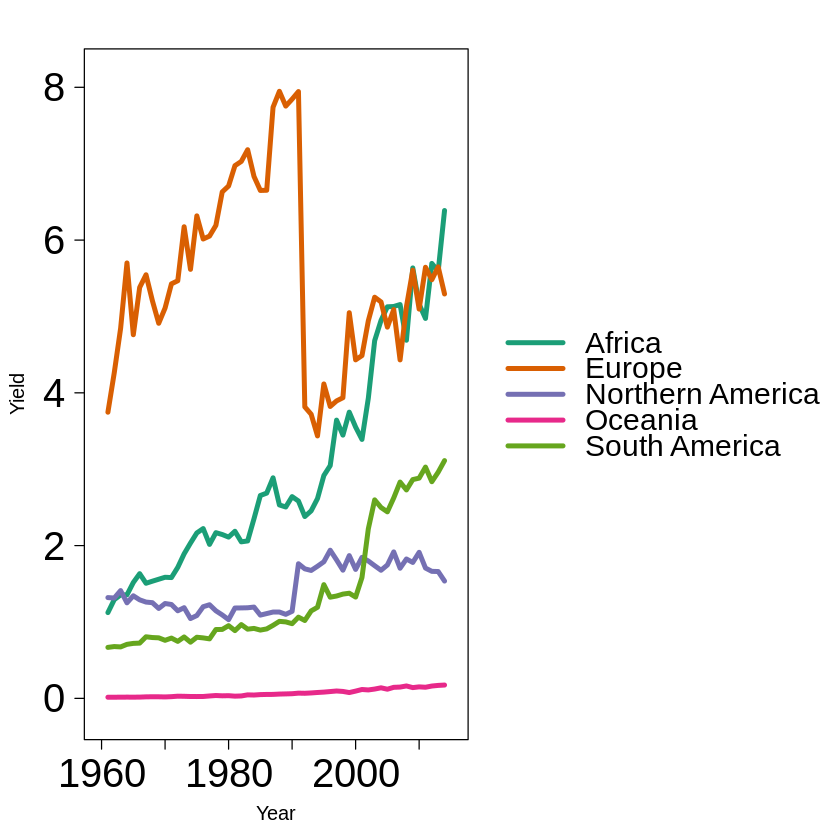

In [8]:
## Select item
item="Watermelon"
## Select colors for the lines
mypalette<-brewer.pal(5,"Dark2")
## Draw a plot with x and y axsis: X = Year, Y = Yield, based on differnt group of area
## Data source = the subset of Item.Code, without "World" and "Asia"
xyplot(Yield~Year,groups=Area, data=droplevels(subset(subset(subset(df1, Item.Code==item), Area!="World"), Area!="Asia")),
       #### Special setup of the figure
       type="l", col=mypalette, lwd=4, 
       scales=list(tck=c(1,0), x=list(cex=2), y=list(cex=2)),
       key=list(space="right",  
                lines=list(col=mypalette, lwd=4),
                text=list(c("Africa","Europe","Northern America","Oceania","South America"), cex=1.5))
       )

### 5.2 Draw a figure of watermelon, only worldwide data and Asia

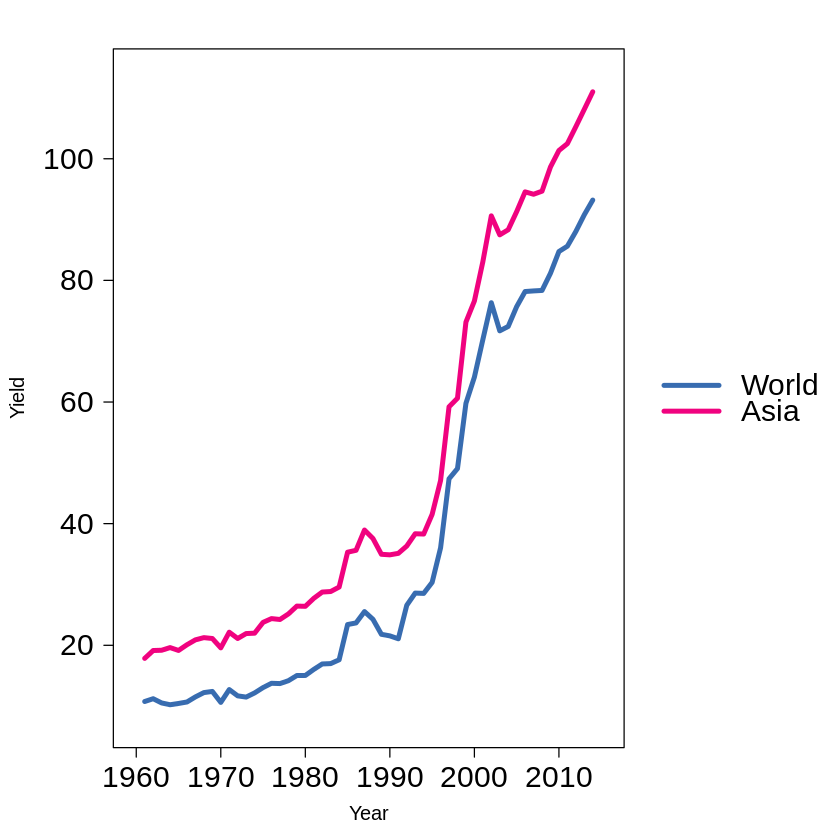

In [9]:
mypalette2<-c("#386CB0", "#F0027F")
df2 <- rbind(subset(df1, Area=="Asia"), subset(df1, Area=="World"))
xyplot(Yield~Year,groups=Area, data=subset(df2, Item.Code==item),
       type="l", col=mypalette2, lwd=4, 
       scales=list(tck=c(1,0), x=list(cex=1.5), y=list(cex=1.5)),
       key=list(space="right",   ##corner=c(0,2),
                lines=list(col=mypalette2, lwd=4),
                text=list(c("World","Asia"), cex=1.5))
)




## Vorlesung 6 - Visualisierung der Ellis Equations

### Einfache Visulisierungen



In [10]:
## eine einfache lineare Funktion
y_linear = function(x){
  return(x+x)
}

## eine einfache quadratische Funktion
y_quadratisch = function(x){
  return(x*x)
}

# Eine Liste erzeugen mit den Werten 0 bis 100
x_list=0:100

## Die Funktion für jeden Wert in x_list anwenden
y_list_linear = y_linear(x=x_list)
y_list_quadratisch = y_quadratisch(x=x_list)

print("y_list_linear")
head(y_list_linear)


print("y_list_quadratisch")
head(y_list_quadratisch)


[1] "y_list_linear"


[1]  0  2  4  6  8 10

[1] "y_list_quadratisch"


[1]  0  1  4  9 16 25

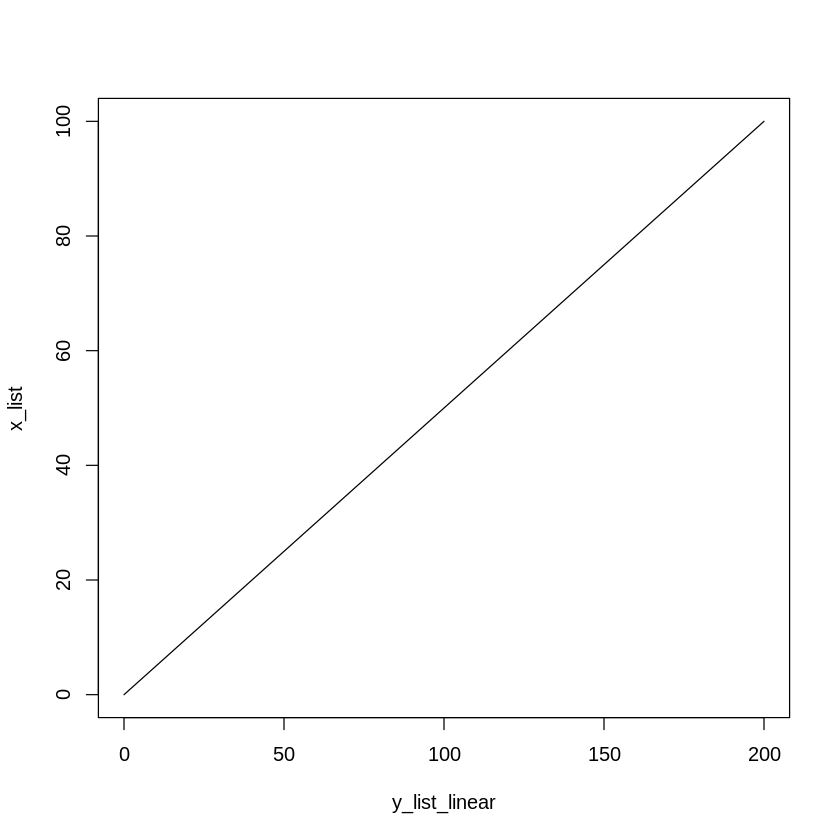

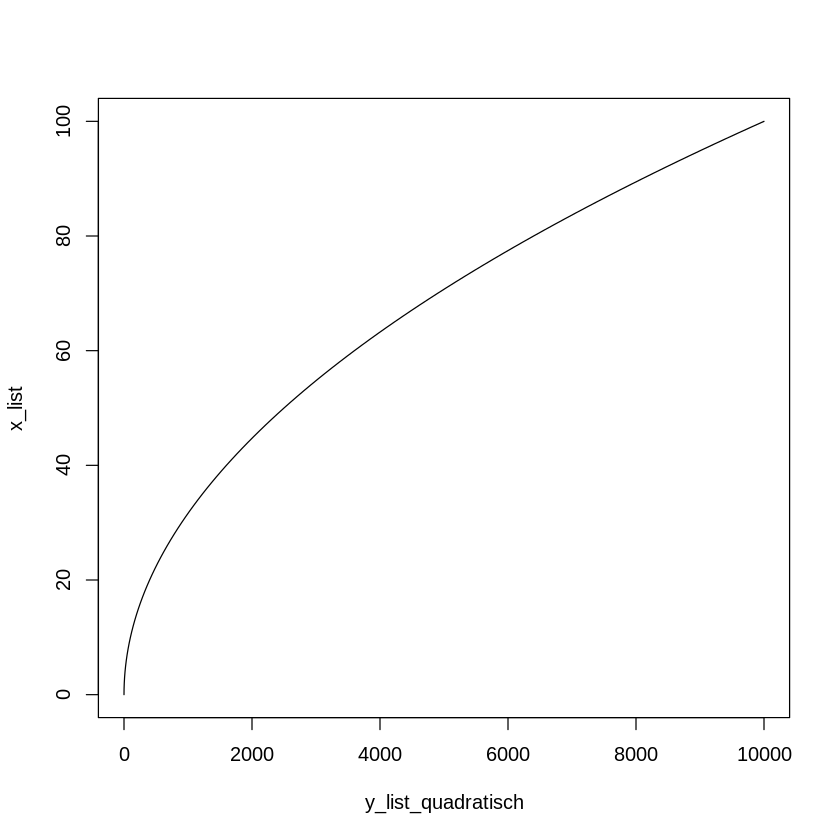

In [11]:


## Visualisierung der Diagramme in einem zweidimensionalen Koordinatensystem

plot(y_list_linear, x_list, type='l', ylim=c(0,100))
plot(y_list_quadratisch, x_list, type='l', ylim=c(0,100))

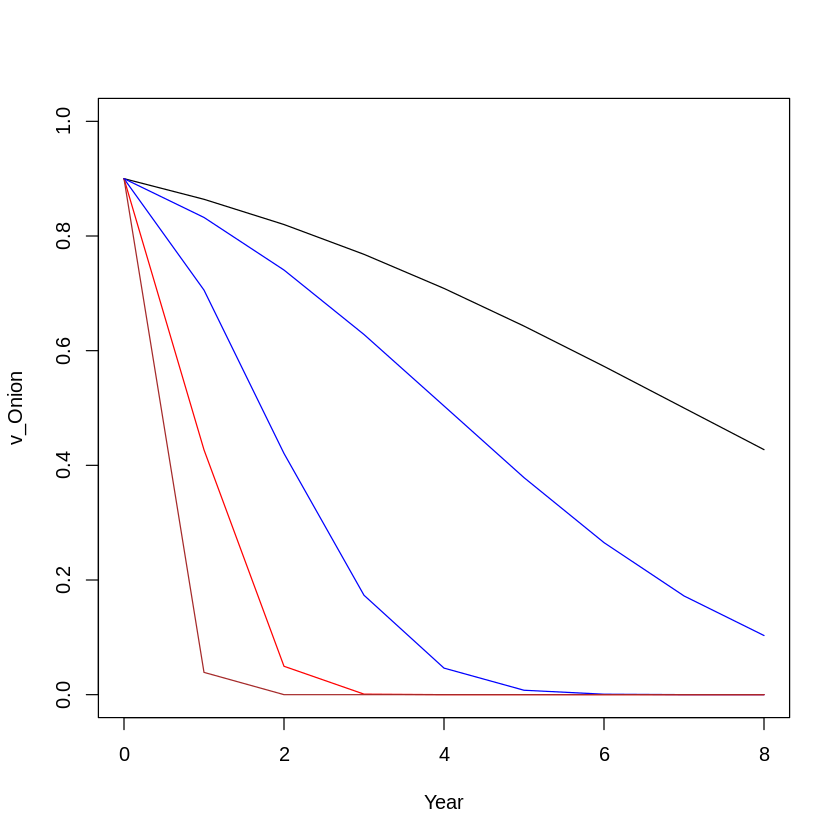

In [12]:
## Robert Ellis Equation
### Warum wird die qnorm Funktion benutzt: https://www.rdocumentation.org/packages/VGAM/versions/0.7-5/topics/probit
eq = function(p, Ki, KE, m, CW, CH, Cq, t){
    # p ... probit
    # Ki ... Keimfähigkeit zu Beginn
    # KE ... 
    # m ... Saatfeuchte während des lagerns, die hoffentlich nicht so hoch
    # CW ... Einfluss der Saatfeuchte
    # CH 
    # Cq
    # t ... temperatur
  v= qnorm(Ki)- p*365/(10^(KE-CW*log10(m)-CH*t-Cq*t^2))
  return(pnorm(v))
}


Year=0:8
v_Onion = eq(p=Year, Ki=0.9, KE=6.975, m=8, CW=3.470, CH=0.040, Cq=0.000428, t=12)
plot(Year, v_Onion, type='l', ylim=c(0,1))
v_Onion20 = eq(p=Year, Ki=0.9, KE=6.975, m=9, CW=3.470, CH=0.040, Cq=0.000428, t=20)
lines(Year, v_Onion20, col="blue")
v_Onion25 = eq(p=Year, Ki=0.9, KE=6.975, m=9, CW=3.470, CH=0.040, Cq=0.000428, t=25)
lines(Year, v_Onion25, col="red")
v_Onion30 = eq(p=Year, Ki=0.9, KE=6.975, m=9, CW=3.470, CH=0.040, Cq=0.000428, t=30)
lines(Year, v_Onion30, col="brown")

## Mit Salat kann man es mal ausprobieren:
## https://data.kew.org/sid/viability/final_percent.jsp?constid=15

Year=0:8
v_test = eq(p=Year, Ki=0.9, KE=6.975, m=8, CW=3.470, CH=0.060, Cq=0.000428, t=12)
lines(Year, v_test, col="blue")



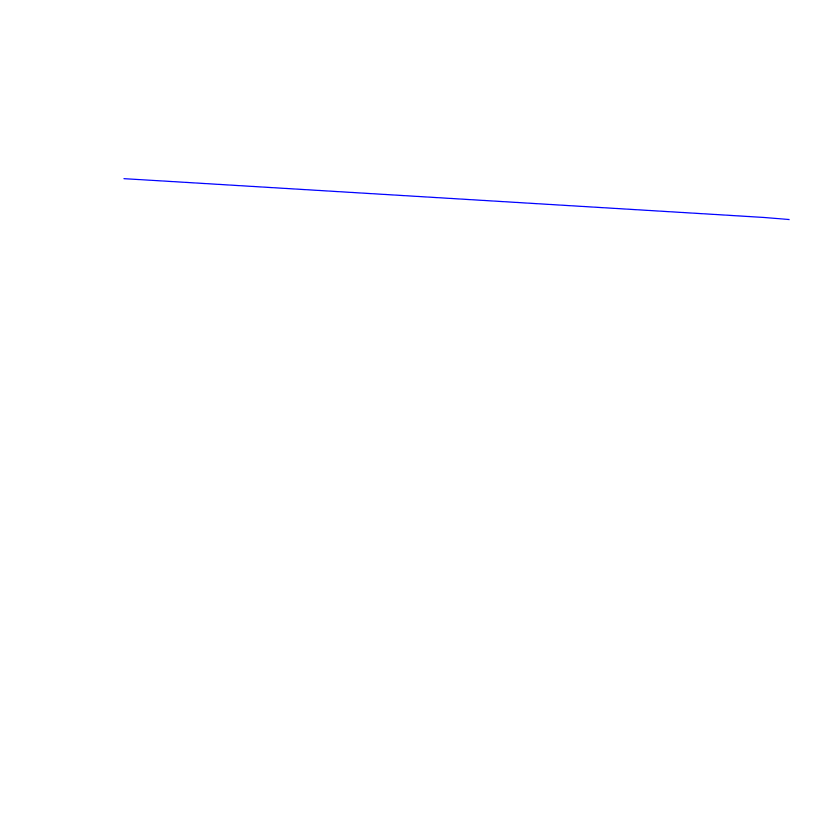

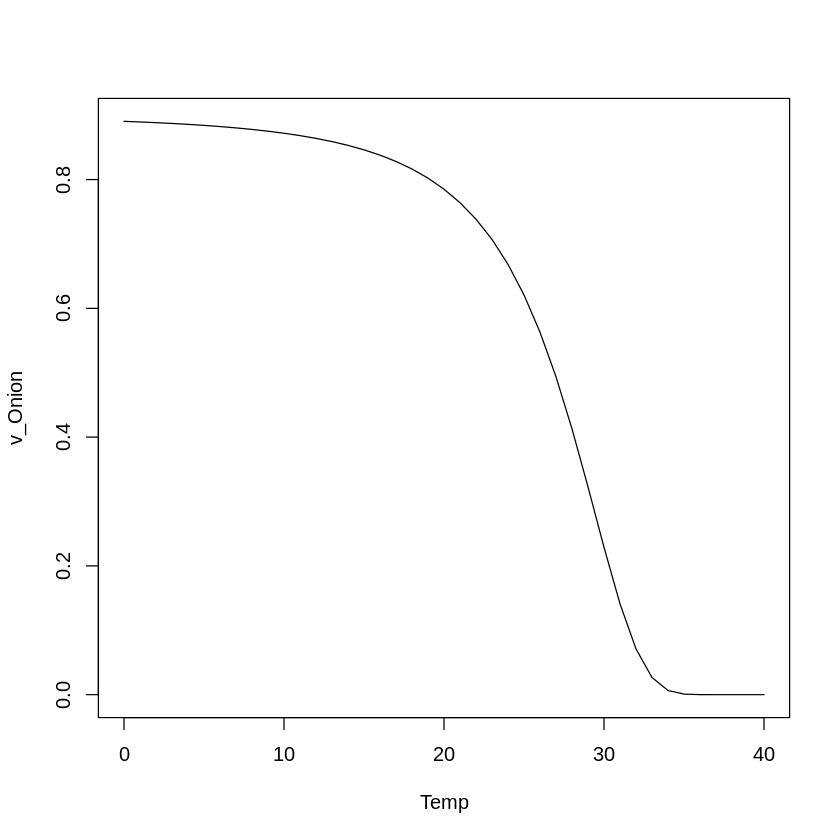

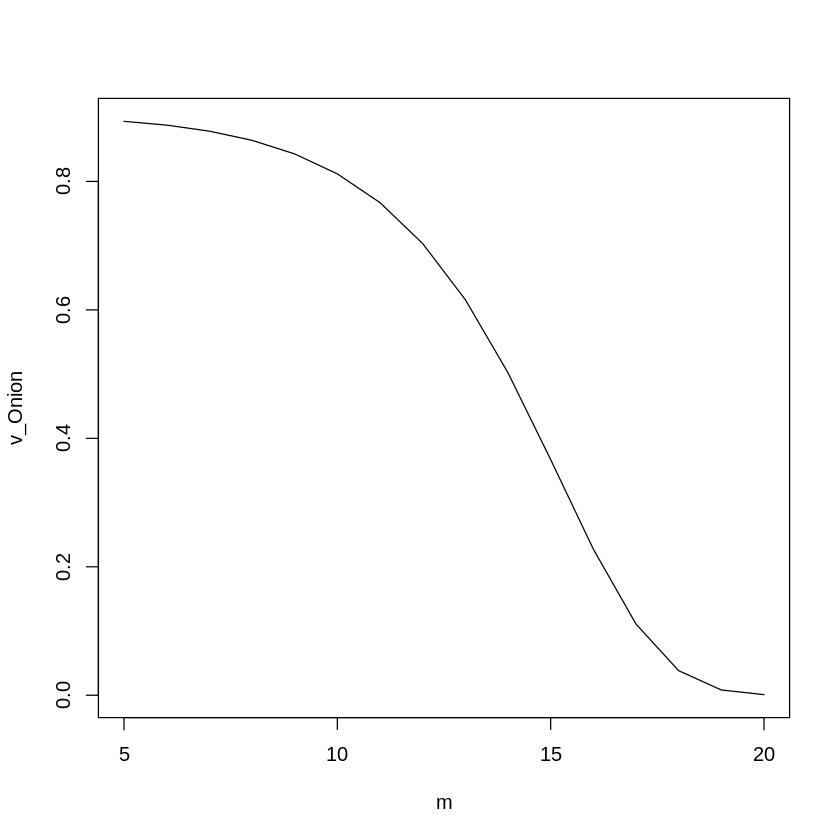

In [13]:
## Testing und mit Parametern spielen

plot.new()

Year=0:8
v_test = eq(p=Year, Ki=0.9, KE=6.975, m=8, CW=3.470, CH=0.060, Cq=0.000428, t=12)
lines(Year, v_test, col="blue")



Temp=0:40
v_Onion = eq(p=1, Ki=0.9, KE=6.975, m=8, CW=3.470, CH=0.040, Cq=0.000428, t=Temp)
plot(Temp, v_Onion, type="l")


m=5:20
v_Onion = eq(p=1, Ki=0.9, KE=6.975, m=m, CW=3.470, CH=0.040, Cq=0.000428, t=12)
plot(m, v_Onion, type="l")




### ggplot als visualiserung benutzen


[1] 0.7003021

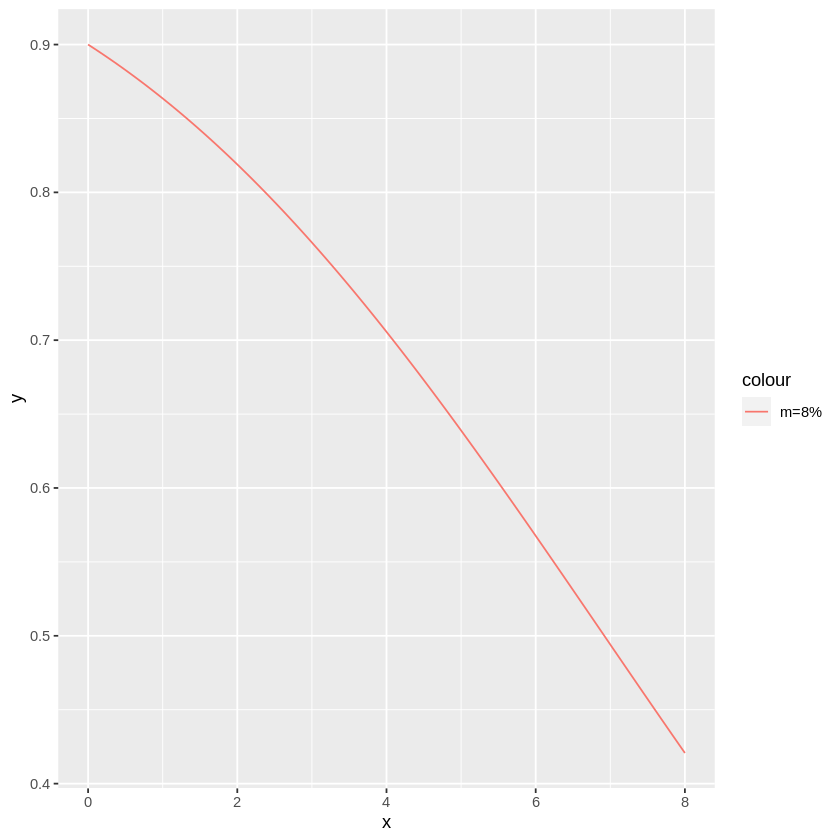

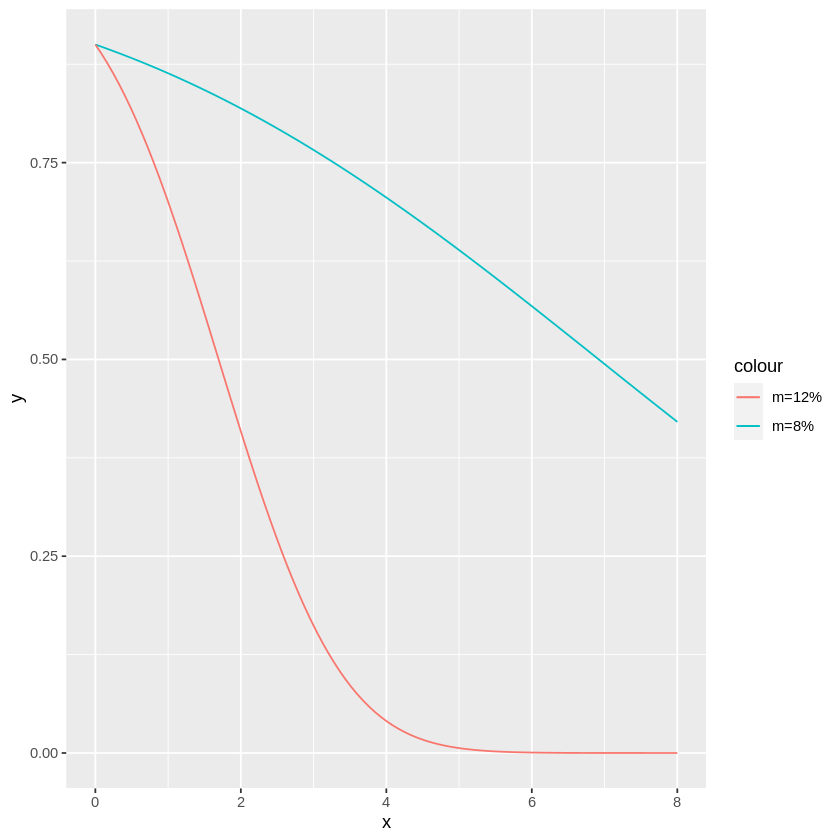

In [14]:
library(ggplot2) ## hätte oben bereits installiert und importiert worden sein.


eq2 = function(x, Ki=0.9, KE=6.97, m=8, CW=3.47, CH=0.040, Cq=0.000428, t=12){
  v= qnorm(Ki)- x*365/(10^(KE-CW*log10(m)-CH*t-Cq*t^2))
  return(pnorm(v))
}

eq2(x=1, m=12)

ggplot(data.frame(x=c(0,8)), aes(x), ylim(0,1)) +
  stat_function(fun=eq2, geom="line", aes(colour="m=8%"))

ggplot(data.frame(x=c(0,8)), aes(x), ylim(0,1)) +
  stat_function(fun=eq2, geom="line", aes(colour="m=8%")) +
  stat_function(fun=eq2,args=list(m=12), geom="line", aes(colour="m=12%")) 
